# Imports/Installs

In [1]:
pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 1.8 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=cd999bccfd456b7a760e98a2b145631a7ccaa19833c462f8be903791169a36b5
  Stored in directory: /root/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty_midi


In [2]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import pretty_midi
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import tensorflow_addons as tfa

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_pitch_class_transition_matrix(self, normalize=False,
                                          time_thresh=0.05,
                                          depth=1):
        """Computes the pitch class transition matrix of this instrument.
        Transitions are added whenever the end of a note is within
        ``time_tresh`` from the start of any other note.
        Parameters
        ----------
        normalize : bool
            Normalize transition matrix such that matrix sum equals to 1.
        time_thresh : float
            Maximum temporal threshold, in seconds, between the start of a note
            and end time of any other note for a transition to be added.
        depth : int
            Number of sequences of notes to consider
        Returns
        -------
        transition_matrix : np.ndarray, shape=(depth*12,depth*12)
            Pitch class transition matrix.
        """

        # instrument is drum or less than one note, return all zeros
        if self.is_drum or len(self.notes) <= 1:
            return np.zeros((12, 12))

        # if depth is greater than 1 get sequences of notes
        if depth > 1:
          note_sequences = [self.notes[i:i+1] for i in range(len(self.notes))]
          pitches = np.array([x.pitch % 12] for x in note_sequences)


        # retrieve note starts, ends and pitch classes(nodes) from self.notes
        starts, ends, nodes = np.array(
            [[x.start, x.end, x.pitch % 12] for x in self.notes]).T

        # compute distance matrix for all start and end time pairs
        dist_mat = np.subtract.outer(ends, starts)

        # find indices of pairs of notes where the end time of one note is
        # within time_thresh of the start time of the other
        sources, targets = np.where(abs(dist_mat) < time_thresh)

        transition_matrix, _, _ = np.histogram2d(nodes[sources],
                                                 nodes[targets],
                                                 bins=np.arange(13),
                                                 normed=normalize)
        return transition_matrix

# EDA

In [6]:
test_data = pretty_midi.PrettyMIDI('/content/BenWebster_ByeByeBlackbird_FINAL.mid')

In [8]:
print(test_data.instruments)

[Instrument(program=0, is_drum=False, name="Melody")]


In [13]:
print(test_data.get_pitch_class_transition_matrix())
transition_matrix = test_data.get_pitch_class_transition_matrix()

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


In [146]:
instrument = test_data.instruments[0]
notes_array = instrument.notes
print(notes_array)

[Note(start=9.310707, end=9.410441, pitch=59, velocity=97), Note(start=9.430388, end=9.767266, pitch=60, velocity=104), Note(start=9.769483, end=9.858135, pitch=59, velocity=102), Note(start=9.862567, end=10.177283, pitch=60, velocity=108), Note(start=10.197230, end=10.567353, pitch=59, velocity=97), Note(start=10.760172, end=11.021696, pitch=60, velocity=108), Note(start=11.037210, end=11.112565, pitch=59, velocity=98), Note(start=11.125863, end=11.447227, pitch=60, velocity=102), Note(start=11.500419, end=11.784106, pitch=59, velocity=95), Note(start=12.872313, end=13.277897, pitch=59, velocity=105), Note(start=13.293411, end=13.610343, pitch=60, velocity=105), Note(start=13.634722, end=13.991548, pitch=59, velocity=101), Note(start=14.031441, end=14.374969, pitch=61, velocity=111), Note(start=14.423728, end=14.818231, pitch=64, velocity=109), Note(start=14.853691, end=15.179489, pitch=62, velocity=109), Note(start=15.308034, end=15.452094, pitch=59, velocity=101), Note(start=15.7690

## Chord Identification

In [151]:
estimated_tempo = test_data.estimate_tempo()
print(estimated_tempo)

190.64829721778386


In [160]:
df = pd.DataFrame()

pitches = np.array([])
for note in notes_array:
  pitches = np.append(pitches, note.pitch)
pitch_diff = np.diff(pitches)

df['pitch_differences'] = pd.Series(pitch_diff)
df['abs_pitch_differences'] = pd.Series(abs(pitch_diff))
df['pitch'] = pd.Series(pitches)

In [205]:
df['minor_third'] = df['pitch_differences'] % 3
df['major_third'] = df['pitch_differences'] % 4
df['major_fourth'] = df['pitch_differences'] % 5
df['minor_fifth'] = df['pitch_differences'] % 6
df['major_fifth'] = df['pitch_differences'] % 7
df['major_seventh'] = (df['pitch_differences'] % 2 == True) | (df['pitch_differences'] % 11 == True)
print(df['major_seventh'])

0       True
1       True
2       True
3       True
4       True
       ...  
445     True
446     True
447     True
448     True
449    False
Name: major_seventh, Length: 450, dtype: bool


In [222]:
from collections import Counter

def estimate_root_pitch(notes_array, note_thresh=10, method='count'):
  starts, ends, nodes, velocity = np.array(
            [[x.start, x.end, x.pitch, x.velocity] for x in notes_array]).T

  note_groups = [nodes[i:i+note_thresh] for i in range(0, len(notes_array), note_thresh)]
  for group in note_groups:
    if method == 'count':
      most_common_pitch = Counter(group)
      return most_common_pitch.most_common(1)[0][0] % 12
    elif method == 'mean':
      mean_pitch = group.mean()
      root_pitch_estimate = round(mean_pitch) % 12
      return round(mean_pitch) % 12
    #elif method == 'wmean':
      #note_lengths = ends - starts
      #total_length = group[0]

In [223]:
estimate_root_pitch(notes_array, method='mean')

11
11
8
0
10
1
6
11
1
9
6
7
0
11
1
0
1
2
4
11
9
0
2
2
9
7
1
6
0
2
2
11
9
9
1
8
10
0
2
2
1
0
9
9
0
11


In [224]:
estimate_root_pitch(notes_array, method='count')

11.0
11.0
2.0
11.0
11.0
2.0
8.0
7.0
2.0
0.0
3.0
7.0
11.0
1.0
2.0
0.0
11.0
4.0
9.0
9.0
11.0
2.0
2.0
5.0
11.0
3.0
5.0
9.0
2.0
7.0
7.0
11.0
5.0
11.0
11.0
11.0
11.0
2.0
7.0
5.0
11.0
3.0
8.0
7.0
7.0
11.0


## Pitch Transitions

In [29]:
row, col = np.indices((12,12))

x_valuesonly = np.array([])
y_valuesonly = np.array([])
z_valuesonly = np.array([])
for xarray, yarray, zarray in zip(row, col, transition_matrix):
  for xvalue, yvalue, zvalue in zip(xarray, yarray, zarray):
    x_valuesonly = np.append(x_valuesonly, xvalue)
    y_valuesonly = np.append(y_valuesonly, yvalue)
    z_valuesonly = np.append(z_valuesonly, zvalue)

In [30]:
print(z_valuesonly)

[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.  1.  0.  4.  0.  1.  0.
  0.  0.  0.  0.  1.  1.  3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.
  1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.  5.  1.  8.  1.  3.  8.
  3.  3.  0.  0.  0.  1.  0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.
  0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.  0.  0.  8.  0.  1.  4.
  1.  4.  8.  6.  3.  6.  1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.
  0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.  2.  1.  1.  0.  1.  0.
  0.  3.  0.  0.  0.  6. 13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]


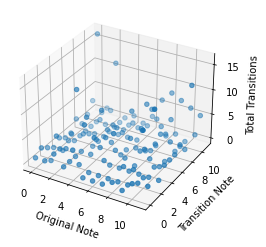

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_valuesonly, y_valuesonly, z_valuesonly)

ax.set_xlabel('Original Note')
ax.set_ylabel('Transition Note')
ax.set_zlabel('Total Transitions')

plt.show()

Text(0, 0.5, 'Proportion')

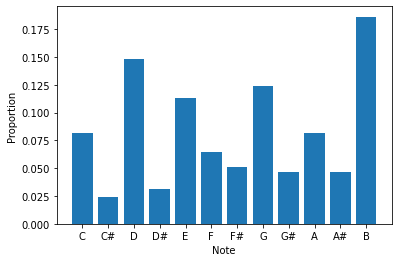

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

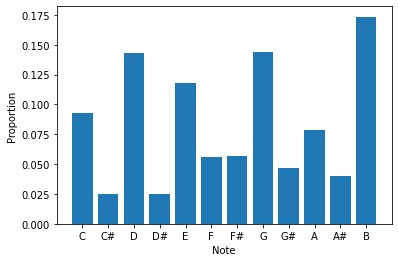

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram(use_duration=True));
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

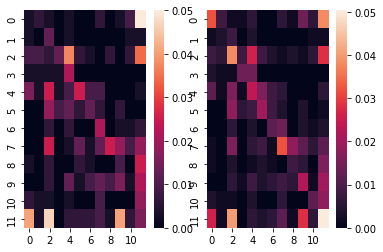

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(test_data.get_pitch_class_transition_matrix(normalize=True), ax=ax1)
sns.heatmap(test_data.get_pitch_class_transition_matrix(time_thresh=0.1, normalize=True), ax=ax2)

In [134]:
transition_matrix = test_data.get_pitch_class_transition_matrix()
print(transition_matrix)

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


In [135]:
normalized_transition_matrix = (transition_matrix / transition_matrix.sum(axis=1)[:, None])
normalized_transition_matrix.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [136]:
print(normalized_transition_matrix)

[[0.03703704 0.07407407 0.03703704 0.         0.03703704 0.
  0.         0.07407407 0.         0.03703704 0.11111111 0.59259259]
 [0.125      0.         0.5        0.         0.125      0.
  0.         0.         0.         0.         0.125      0.125     ]
 [0.07142857 0.07142857 0.04761905 0.0952381  0.28571429 0.04761905
  0.02380952 0.         0.04761905 0.         0.04761905 0.26190476]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.63636364 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.15151515 0.03030303 0.24242424 0.03030303 0.09090909 0.24242424
  0.09090909 0.09090909 0.         0.         0.         0.03030303]
 [0.         0.         0.26086957 0.13043478 0.17391304 0.08695652
  0.17391304 0.08695652 0.         0.08695652 0.         0.        ]
 [0.         0.         0.13333333 0.         0.13333333 0.
  0.         0.46666667 0.         0.06666667 0.06666667 0.13333333]
 [0.         0.         0.19512195 0.         0.02439024 0.09756098
  0.0

In [138]:
# probability of transitioning to B given the last two notes were C
print(normalized_transition_matrix[0, 11] * normalized_transition_matrix[0, 11])

0.3511659807956104


## Markov Chain Generation

Here I am assuming that only the previous note matters for the conditional probability of the next note. This is purely to see how interesting the generated MIDI file will be using only the main pitch classes and markov probabilities.

In [ ]:
generating_seed = 8
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = D, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=1.000000, pitch=56, velocity=100), Note(start=1.000000, end=2.000000, pitch=59, velocity=100), Note(start=2.000000, end=3.000000, pitch=50, velocity=100), Note(start=3.000000, end=4.000000, pitch=51, velocity=100), Note(start=4.000000, end=5.000000, pitch=52, velocity=100), Note(start=5.000000, end=6.000000, pitch=50, velocity=100), Note(start=6.000000, end=7.000000, pitch=58, velocity=100), Note(start=7.000000, end=8.000000, pitch=48, velocity=100), Note(start=8.000000, end=9.000000, pitch=58, velocity=100), Note(start=9.000000, end=10.000000, pitch=59, velocity=100), Note(start=10.000000, end=11.000000, pitch=54, velocity=100), Note(start=11.000000, end=12.000000, pitch=57, velocity=100), Note(start=12.000000, end=13.000000, pitch=52, velocity=100), Note(start=13.000000, end=14.000000, pitch=53, velocity=100), Note(start=14.000000, end=15.000000, pitch=51, velocity=100), Note(start=15.000000, end=16.000000, pitch=52, velocity=100), Note(start=16.000000, end=

In [ ]:
markov_generation.write('markov_file.mid')

In [ ]:
total_velocity = sum(sum(test_data.get_chroma()))
relative_velocities = [sum(semitone)/total_velocity for semitone in test_data.get_chroma()]

In [ ]:
note_onsets = test_data.get_onsets()
diffs = np.diff(note_onsets)

In [ ]:
df = pd.DataFrame(diffs)
df.head()

,0
0,0.119681
1,0.339095
2,0.093085
3,0.334662
4,0.562942


In [ ]:
for i in range(1, 20):
  print(df[0].autocorr(lag=i))

-0.10715865506458105
-0.009365891233449719
-0.029572998655734026
0.006918118671287464
-0.011372083819947925
-0.07414209123533516
0.00015655590516185382
-0.010029621020523101
-0.022774914803371536
-0.01268020981272752
0.04105423018370424
-0.05573869157264071
0.07558720595490699
-0.028875628754764376
-0.020163301584180525
-0.04321019764270097
-0.006882774503549483
0.019852556638214093
0.027637428152013116


In [32]:
instrument = test_data.instruments[0]
notes_array = instrument.notes
print(notes_array)

[Note(start=9.310707, end=9.410441, pitch=59, velocity=97), Note(start=9.430388, end=9.767266, pitch=60, velocity=104), Note(start=9.769483, end=9.858135, pitch=59, velocity=102), Note(start=9.862567, end=10.177283, pitch=60, velocity=108), Note(start=10.197230, end=10.567353, pitch=59, velocity=97), Note(start=10.760172, end=11.021696, pitch=60, velocity=108), Note(start=11.037210, end=11.112565, pitch=59, velocity=98), Note(start=11.125863, end=11.447227, pitch=60, velocity=102), Note(start=11.500419, end=11.784106, pitch=59, velocity=95), Note(start=12.872313, end=13.277897, pitch=59, velocity=105), Note(start=13.293411, end=13.610343, pitch=60, velocity=105), Note(start=13.634722, end=13.991548, pitch=59, velocity=101), Note(start=14.031441, end=14.374969, pitch=61, velocity=111), Note(start=14.423728, end=14.818231, pitch=64, velocity=109), Note(start=14.853691, end=15.179489, pitch=62, velocity=109), Note(start=15.308034, end=15.452094, pitch=59, velocity=101), Note(start=15.7690

In [47]:
print(len(notes_array))

451


In [100]:
pitch_classes = {0:'C',
                 1:'C#',
                 2:'D',
                 3:'D#',
                 4:'E',
                 5:'F',
                 6:'F#',
                 7:'G',
                 8:'G#',
                 9:'A',
                 10:'A#',
                 11:'B'}

In [84]:
test = [notes_array[i:i+2] for i in range(0, len(notes_array), 2)]
print(test)

[[Note(start=9.310707, end=9.410441, pitch=59, velocity=97), Note(start=9.430388, end=9.767266, pitch=60, velocity=104)], [Note(start=9.769483, end=9.858135, pitch=59, velocity=102), Note(start=9.862567, end=10.177283, pitch=60, velocity=108)], [Note(start=10.197230, end=10.567353, pitch=59, velocity=97), Note(start=10.760172, end=11.021696, pitch=60, velocity=108)], [Note(start=11.037210, end=11.112565, pitch=59, velocity=98), Note(start=11.125863, end=11.447227, pitch=60, velocity=102)], [Note(start=11.500419, end=11.784106, pitch=59, velocity=95), Note(start=12.872313, end=13.277897, pitch=59, velocity=105)], [Note(start=13.293411, end=13.610343, pitch=60, velocity=105), Note(start=13.634722, end=13.991548, pitch=59, velocity=101)], [Note(start=14.031441, end=14.374969, pitch=61, velocity=111), Note(start=14.423728, end=14.818231, pitch=64, velocity=109)], [Note(start=14.853691, end=15.179489, pitch=62, velocity=109), Note(start=15.308034, end=15.452094, pitch=59, velocity=101)], [N

In [93]:
histogram_labels = [i for i in range(12 ** 2)]
print(histogram_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]


In [103]:
pitch_sequences = np.array([''.join([pitch_classes[note.pitch % 12] for note in notes]) for notes in test])
print(len(pitch_sequences))
#np.histogram2d(set(pitch_sequences), pitch_sequences)

226


In [115]:
print(pitch_sequences)
print(len(set(pitch_sequences)))
df_pitch_sequences = pd.DataFrame(pitch_sequences)
df_pitch_sequences.rename(columns={0:'pitch_sequences'}, inplace=True)

['BC' 'BC' 'BC' 'BC' 'BB' 'CB' 'C#E' 'DB' 'AE' 'AB' 'DF' 'AB' 'DE' 'GF#'
 'GG#' 'BF' 'D#E' 'CB' 'CB' 'AB' 'EF#' 'BA' 'GG#' 'BD' 'FD#' 'ED' 'D#C#'
 'DC#' 'BC' 'BA#' 'G#A' 'F#D' 'G#A' 'F#G' 'FE' 'GG#' 'BD' 'GB' 'CC#' 'EC#'
 'DE' 'FD' 'D#E' 'BF#' 'AG#' 'EG#' 'CC' 'EF#' 'G#B' 'DC' 'D#D#' 'DC#' 'DD'
 'BB' 'AE' 'ED' 'F#G' 'AB' 'GG' 'G#F#' 'BF' 'EG' 'A#G' 'AG' 'BC' 'C#D'
 'C#A#' 'C#C' 'GG' 'F#B' 'DD' 'BD' 'BD' 'BD' 'BD' 'A#C' 'BA' 'EC' 'BA'
 'D#C' 'BA' 'DB' 'A#B' 'DF' 'F#D' 'EF' 'DD' 'EF' 'DE' 'CG' 'DF#' 'AG'
 'G#D#' 'EF' 'AA' 'FA' 'AA#' 'CE' 'EC' 'EE' 'GB' 'DB' 'A#E' 'FF#' 'GB'
 'DE' 'DE' 'DB' 'AG' 'DA#' 'BG' 'BD' 'EF' 'DE' 'FD' 'FF' 'DE' 'GG#' 'BD'
 'FD' 'EB' 'F#G' 'G#B' 'CA#' 'GE' 'D#D#' 'CA' 'G#D' 'BA' 'FG' 'FF#' 'GA#'
 'BD' 'EG' 'A#B' 'AA#' 'AG' 'AG' 'FE' 'A#B' 'DC' 'EE' 'F#E' 'DC' 'BE'
 'F#G' 'F#G' 'GG' 'DC' 'A#B' 'GD' 'CA#' 'BB' 'GG' 'DA#' 'BB' 'CC#' 'CC#'
 'DB' 'FG' 'FD' 'G#F' 'BG#' 'DB' 'CD' 'BC' 'BA' 'EG' 'F#B' 'GG#' 'FD'
 'D#E' 'CB' 'AB' 'GA' 'GA' 'BC' 'BA' 'BF#' 'ED' 'EC' 'BA' 'BF

In [116]:
df_pitch_sequences.head()

,pitch_sequences
0,BC
1,BC
2,BC
3,BC
4,BB


In [121]:
numbers = sorted(df_pitch_sequences['pitch_sequences'].unique())

In [122]:
df_pitch_sequences['lag'] = df_pitch_sequences['pitch_sequences'].shift(1)
groups = df_pitch_sequences.groupby(['pitch_sequences', 'lag'])

counts = {i[0]:(len(i[1]) if i[0][0] != i[0][1] else 0) for i in groups}

In [126]:
counts = {}
for pair, group in groups:
    if pair[0] != pair[1]:  # don't count (816,816)

        #counts[(A,B)] = len((A,B)) + len((B,A)) 
        if pair not in counts:
            counts[pair] = len(group) # put first value
        else:
            counts[pair] += len(group) # add second value

        #counts[(B,A)] = len((A,B)) + len((B,A)) 
        if (pair[1],pair[0]) not in counts:
            counts[(pair[1],pair[0])] = len(group) # put first value
        else:
            counts[(pair[1],pair[0])] += len(group) # add second value
    else:  
        counts[pair] = 0 # (816,816) gives 0

#counts[(A,B)] == counts[(B,A)]

counts_2 = {}               
for pair, count in counts.items():
    if count > 10 :
        counts_2[pair] = -count
    else:
        counts_2[pair] = count

matrix = pd.DataFrame()

for x in numbers:
    matrix[str(x)] = pd.Series([counts_2.get((x,y), 0) for y in numbers], index=numbers)

print(len(matrix))
print(len(matrix.columns))

86
86


<AxesSubplot:>

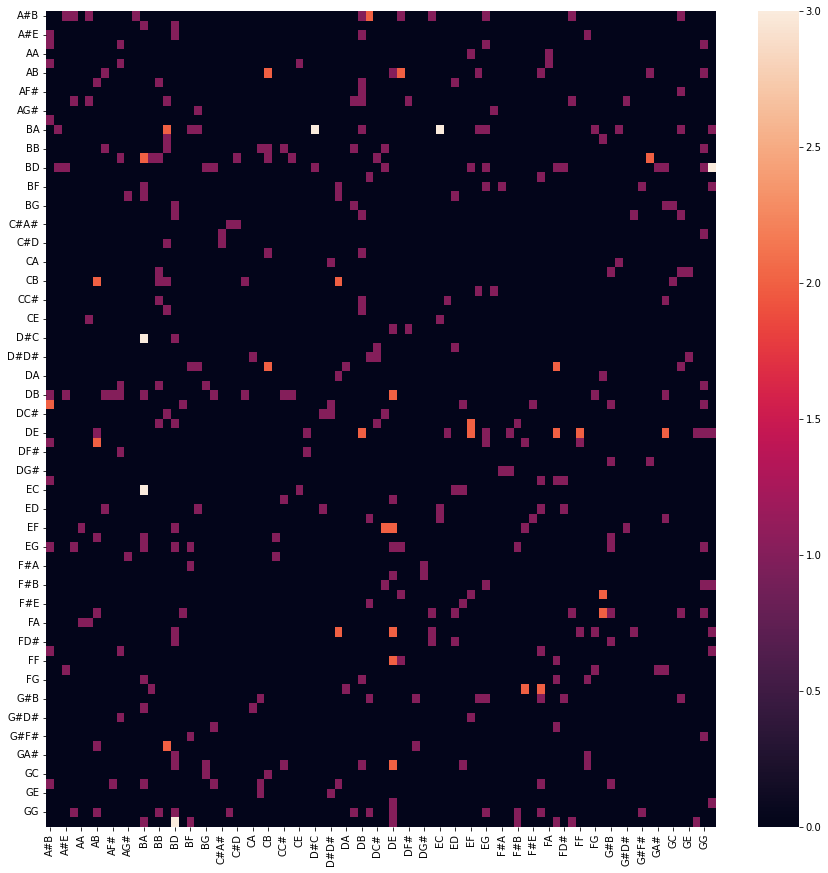

In [128]:
plt.figure(figsize = (15,15))
sns.heatmap(matrix)

In [140]:
sequence_probs = matrix / matrix.sum(axis=1)
print(sequence_probs['BC'])

A#B    0.0
A#C    0.0
A#E    0.0
A#G    0.0
AA     0.0
      ... 
GD     0.0
GE     0.0
GF#    0.0
GG     0.0
GG#    0.0
Name: BC, Length: 86, dtype: float64


### Pitch Differences

In [42]:
df = pd.DataFrame()

pitches = np.array([])
for note in notes_array:
  pitches = np.append(pitches, note.pitch)
pitch_diff = np.diff(pitches)

In [43]:
df['pitch_differences'] = pd.Series(pitch_diff)
df['abs_pitch_differences'] = pd.Series(abs(pitch_diff))

pitch_diff_autocorr = np.array([])

for i in range(1, 15):
  print(df['pitch_differences'].autocorr(lag=i))
  np.append(pitch_diff_autocorr, df['pitch_differences'].autocorr(lag=i))

-0.11743683657315508
-0.08221977930119176
-0.17463369167872905
-0.08201901021648934
-0.06027271152641812
0.024730635033375914
0.12049532250018831
0.04660158582486218
-0.038033149656083176
-0.12926461937586606
0.005062574143961646
-0.08358514200545225
0.08281810434995666
0.0005361159198904945


In [49]:
print(df['pitch_differences'].var())
print(df['pitch_differences'].std())

13.086859688195991
3.6175764937587696


In [65]:
print(df['pitch_differences'].pct_change())
df['percent_pitch_difference'] = df['pitch_differences'].pct_change()
df['log_percent_pitch_difference'] = np.log(df['percent_pitch_difference'])

0           NaN
1     -2.000000
2     -2.000000
3     -2.000000
4     -2.000000
         ...   
445        -inf
446   -0.666667
447   -2.000000
448   -0.666667
449   -1.000000
Name: pitch_differences, Length: 450, dtype: float64


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_percent_pitch_difference', ylabel='Probability'>

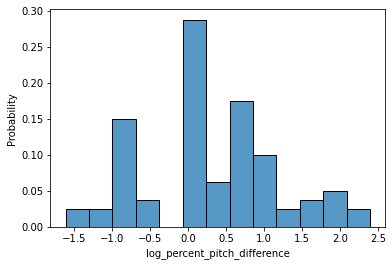

In [66]:
sns.histplot(df['log_percent_pitch_difference'], stat='probability')

<AxesSubplot:xlabel='percent_pitch_difference', ylabel='Probability'>

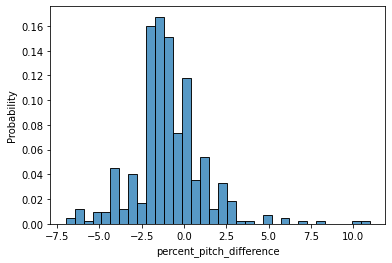

In [61]:
sns.histplot(df['percent_pitch_difference'], stat='probability')

<AxesSubplot:xlabel='pitch_differences', ylabel='Probability'>

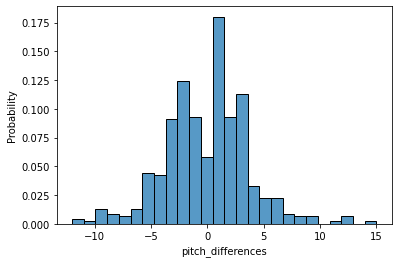

In [63]:
sns.histplot(df['pitch_differences'], stat='probability')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

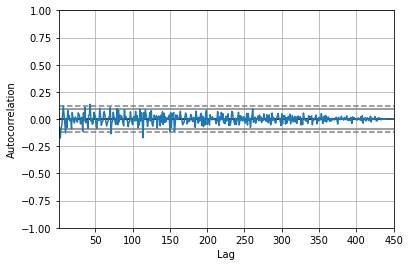

In [37]:
pd.plotting.autocorrelation_plot(df['pitch_differences'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

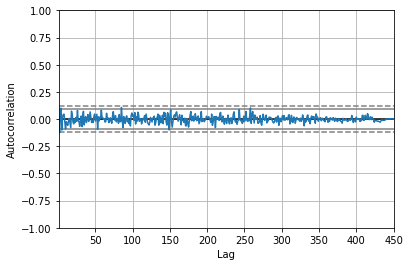

In [38]:
pd.plotting.autocorrelation_plot(df['abs_pitch_differences'])

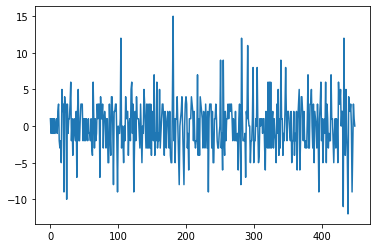

In [39]:
plt.plot(df['pitch_differences'])

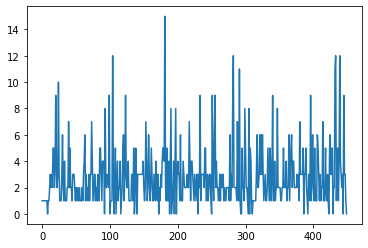

In [ ]:
plt.plot(df['abs_pitch_differences'])

In [ ]:
for i in range(1, 15):
  print(df['abs_pitch_differences'].autocorr(lag=i))

0.004316836106453496
-0.12639900243843888
0.07759911796162233
0.1003851307652579
-0.10237315261558735
0.018005640869022548
0.043189593788525237
0.046050536390237956
-0.02539290294636359
-0.09414363547343091
-0.02540372368081871
-0.04747862190373646
-0.05976333050462661
-0.016532632220049442


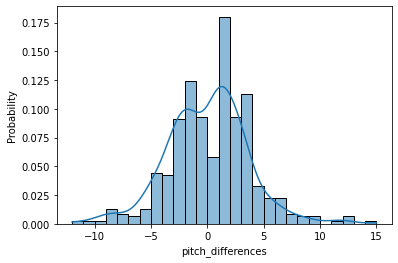

In [ ]:
sns.histplot(df['pitch_differences'], stat='probability', kde=True, binwidth=1)

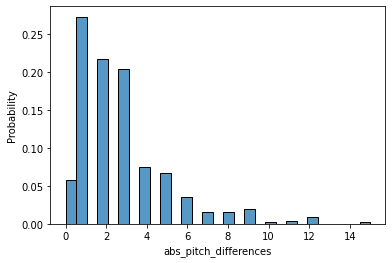

In [ ]:
sns.histplot(df['abs_pitch_differences'], stat='probability')

### Note Velocity

In [ ]:
velocities = np.array([])
for note in notes_array:
  velocities = np.append(velocities, note.velocity)

df['velocities'] = pd.Series(velocities)

for i in range(1, 15):
  print(df['velocities'].autocorr(lag=i))

velocity_autocorr = [df['velocities'].autocorr(lag=i) for i in range(1, 20)]
print(velocity_autocorr)

0.20053192938119485
0.20384710634049216
0.09642201219541524
0.17664111525334592
0.1441390460992251
0.05854204982299221
0.17299645922945725
0.05962780554886093
0.11538412097348233
0.03217629204087941
0.11414962063032061
0.12712547013594033
0.010838262511584455
0.16573222293226592
[0.20053192938119485, 0.20384710634049216, 0.09642201219541524, 0.17664111525334592, 0.1441390460992251, 0.05854204982299221, 0.17299645922945725, 0.05962780554886093, 0.11538412097348233, 0.03217629204087941, 0.11414962063032061, 0.12712547013594033, 0.010838262511584455, 0.16573222293226592, 0.09872356650791976, 0.15346117010440075, 0.04684346619531862, 0.1056026136640485, 0.10323806314380926]


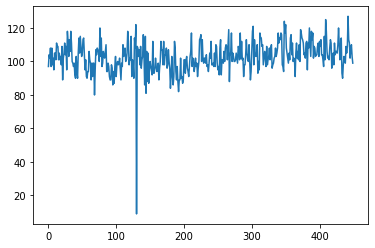

In [ ]:
plt.plot(df['velocities'])

In [ ]:
adf_velocity = sm.tsa.stattools.adfuller(df['velocities'])
print(adf_velocity)

(-3.5722571734673565, 0.006314105848430447, 13, 436, {'1%': -3.445437655635993, '5%': -2.8681918844944785, '10%': -2.5703132171113543}, 3115.401289002799)


In [ ]:
print(df['velocities'].mean())
print(df['velocities'].median())

102.67555555555556
102.0


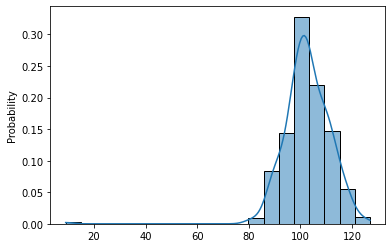

In [ ]:
sns.histplot(velocities, stat='probability', kde=True, bins=20)

In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities
0,1.000000,-0.061628,0.248994,-0.178110
pitch_differences,-0.061628,1.000000,0.015578,-0.071242
abs_pitch_differences,0.248994,0.015578,1.000000,-0.045845
velocities,-0.178110,-0.071242,-0.045845,1.000000


In [ ]:
# both time series are stationary so they will definitely be cointegrated
# This is just to get a way to generate velocity and note length without just sampling from a histogram
import statsmodels.tsa.stattools as ts 
velocity_pitch_diff_coint = ts.coint(df['velocities'], df['pitch_differences'])
print(velocity_pitch_diff_coint)

(-3.5901058964599244, 0.025200676670241073, array([-3.92099806, -3.34977208, -3.05390937]))


In [ ]:
import statsmodels.api as sm
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['velocities']
velocity_model = sm.OLS(Y, X)
velocity_reg = velocity_model.fit()
print(velocity_reg.params)
print(velocity_reg.tvalues)
print(velocity_reg.summary())

const                102.675556
pitch_differences     -0.181076
dtype: float64
const                237.219575
pitch_differences     -1.511743
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             velocities   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.285
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.131
Time:                        18:00:18   Log-Likelihood:                -1635.3
No. Observations:                 450   AIC:                             3275.
Df Residuals:                     448   BIC:                             3283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


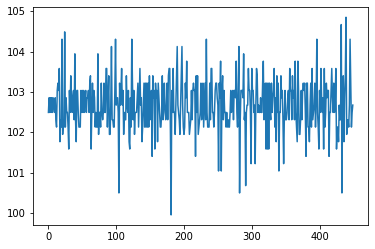

In [ ]:
stationary_timeseries = velocity_reg.predict(X)

plt.plot(stationary_timeseries)

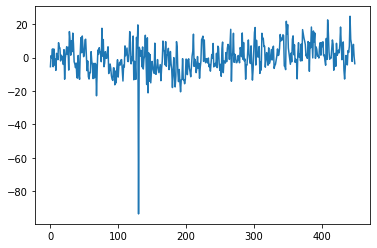

In [ ]:
residual = df['velocities'] - stationary_timeseries

plt.plot(residual)

Text(0, 0.5, 'Autocorrelation')

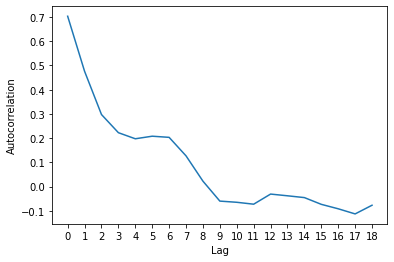

In [ ]:
plt.plot(np.arange(19), velocity_autocorr);
plt.xticks(np.arange(19))
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

### Note Lengths

In [ ]:
note_lengths = np.array([])
for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

df['note_lengths'] = pd.Series(note_lengths)

for i in range(1, 15):
  print(df['note_lengths'].autocorr(lag=i))

note_length_autocorr = [df['note_lengths'].autocorr(lag=i) for i in range(1, 20)]
print(note_length_autocorr)

-0.023875934431557083
0.07552683211534453
0.03839679263396763
0.06547358391116773
0.0035883991242379723
0.04294822358566039
0.00838443658781366
0.016853189562664846
-0.037715235261214466
0.0880282448114739
0.07921024809343846
-0.026630123968682803
-0.014708137717257356
-0.05681884198167854
[-0.023875934431557083, 0.07552683211534453, 0.03839679263396763, 0.06547358391116773, 0.0035883991242379723, 0.04294822358566039, 0.00838443658781366, 0.016853189562664846, -0.037715235261214466, 0.0880282448114739, 0.07921024809343846, -0.026630123968682803, -0.014708137717257356, -0.05681884198167854, 0.053887011330169175, -0.019662791270126947, 0.012201656759489697, -0.02744237635647326, -0.02268996790501803]


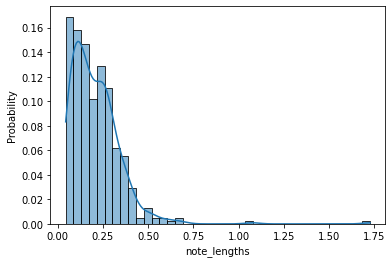

In [ ]:
sns.histplot(df['note_lengths'], stat='probability', kde=True)

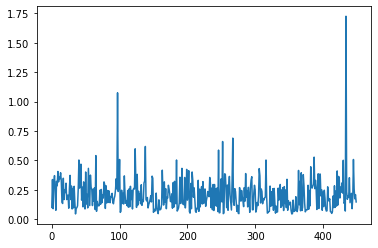

In [ ]:
plt.plot(df['note_lengths'])

In [ ]:
adf_note_lengths = sm.tsa.stattools.adfuller(df['note_lengths'])
print(adf_note_lengths)

(-21.6625605878343, 0.0, 0, 449, {'1%': -3.4449982835447894, '5%': -2.8679986379826814, '10%': -2.5702102140862397}, -445.0780348207487)


In [ ]:
df['note_lengths'].mean()

0.2089189755671288

In [ ]:
pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

df['pitch'] = pd.Series(pitch)

,note_lengths,pitch
pitch,,
49.0,0.246010,1
50.0,0.385637,8
51.0,0.507534,4
52.0,0.503102,15
53.0,0.305850,10
54.0,0.618350,19
55.0,0.363474,34
56.0,0.281471,20
57.0,0.540779,27


In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.044195,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.385301,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.070434,0.069015,-0.070434
velocities,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000
note_lengths,0.551211,-0.120783,0.069015,0.100938,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000


In [ ]:
note_length_pitch_differences_coint = ts.coint(df['note_lengths'], df['pitch_differences'])
print(note_length_pitch_differences_coint)

(-21.034689204322735, 0.0, array([-3.92099806, -3.34977208, -3.05390937]))


In [ ]:
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['note_lengths']
note_lengths_model = sm.OLS(Y, X)
note_lengths_reg = note_lengths_model.fit()
print(note_lengths_reg.params)
print(note_lengths_reg.tvalues)
print(note_lengths_reg.summary())

const                0.208919
pitch_differences   -0.004780
dtype: float64
const                31.149601
pitch_differences    -2.575354
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           note_lengths   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.632
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0103
Time:                        18:05:16   Log-Likelihood:                 239.97
No. Observations:                 450   AIC:                            -475.9
Df Residuals:                     448   BIC:                            -467.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


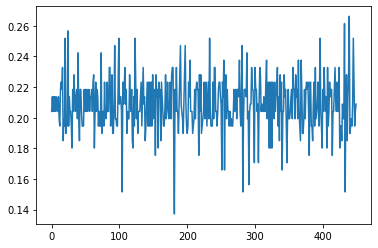

In [ ]:
stationary_timeseries = note_lengths_reg.predict(X)

plt.plot(stationary_timeseries)

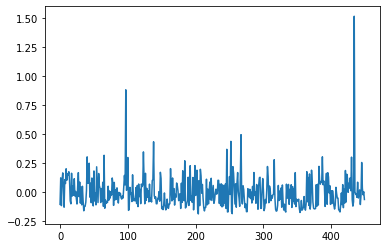

In [ ]:
residual = df['note_lengths'] - stationary_timeseries

plt.plot(residual)

### Pitches

In [ ]:
# While it's useful to interpret the pitch as separate classes they're technically integers where larger integers
# correspond to higher pitches and we can derive useful insight from viewing them like that as well
pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

df['pitch'] = pd.Series(pitch)

for i in range(1, 15):
  print(df['pitch'].autocorr(lag=i))

pitch_autocorr = [df['pitch'].autocorr(lag=i) for i in range(1, 20)]
print(pitch_autocorr)

0.7030642526961793
0.47587535580180385
0.2974103040805971
0.22248237555374528
0.19739629422145782
0.20798016044104115
0.2032381128109502
0.1268452692789457
0.02245131546681643
-0.059857156117539355
-0.06472616449458478
-0.0726092103538262
-0.03084685157699628
-0.03794778953448314
[0.7030642526961793, 0.47587535580180385, 0.2974103040805971, 0.22248237555374528, 0.19739629422145782, 0.20798016044104115, 0.2032381128109502, 0.1268452692789457, 0.02245131546681643, -0.059857156117539355, -0.06472616449458478, -0.0726092103538262, -0.03084685157699628, -0.03794778953448314, -0.04538447936529851, -0.07323092778243448, -0.09158143237729469, -0.11273800607693207, -0.07692298311693586]


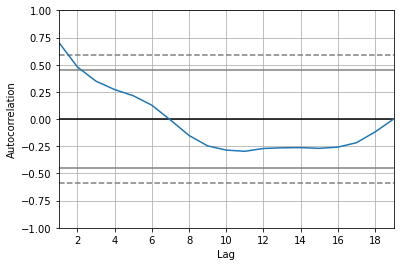

In [ ]:
pd.plotting.autocorrelation_plot(pitch_autocorr)

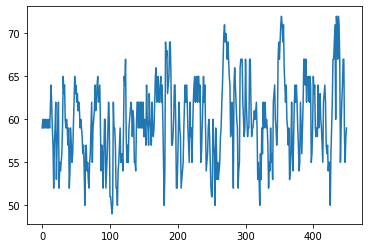

In [ ]:
df['pitch'].plot.line()

In [ ]:
adf = sm.tsa.stattools.adfuller(df['pitch'])
print(adf)

(-6.010344717258276, 1.5789581051357013e-07, 8, 441, {'1%': -3.4452655826028318, '5%': -2.868116205869215, '10%': -2.570272878944473}, 2276.2320199460414)


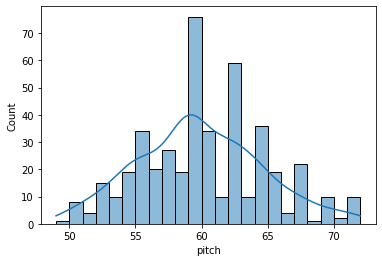

In [ ]:
sns.histplot(df['pitch'], kde=True, binwidth=1)

In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.178110,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.071242,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.045845,0.069015,-0.070434
velocities,-0.178110,-0.071242,-0.045845,1.000000,-0.158113,0.237051
note_lengths,0.551211,-0.120783,0.069015,-0.158113,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,0.237051,0.100938,1.000000


# A Slightly Less Boring Model

This model will use the simple linear regressions between note lengths and pitch difference, and velocity and pitch difference to create a MIDI file that sounds less robotic if still somewhat boring.

In [ ]:
generating_seed = 0
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = D, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)
generated_note_lengths = note_lengths_reg.predict(note_diffs)

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

ValueError: ignored

In [ ]:
generating_seed = 0

categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

In [ ]:
cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

[ 0.165899    0.37481798  0.58373695  0.78309594  1.03503488  1.24873386
  1.45287283  1.61877184  1.83725081  2.05094978  2.28854874  2.48790772
  2.71116669  2.90574567  3.10510465  3.29012364  3.50860261  3.70796159
  3.95990054  4.17359951  4.38729849  4.5436375   4.80513644  4.96147545
  5.17995442  5.39843339  5.60735236  5.80193135  6.00607032  6.23888929
  6.44302826  6.66150723  6.86086621  7.09368518  7.29304416  7.48762314
  7.69176212  7.8863411   8.11916007  8.34719903  8.53699802  8.731577
  8.93093598  9.19243492  9.34877393  9.55769291  9.81919185  9.97553086
 10.21790981 10.42204879 10.63574777 10.83032675 11.06314571 11.26250469
 11.45708368 11.67556265 11.89404162 12.09818059 12.29753958 12.52557854
 12.69147754 12.94341649 13.14277547 13.34213445 13.54627343 13.75041241
 13.9449914  14.19693034 14.39628933 14.59086831 14.82368727 15.02782625
 15.23196523 15.46000419 15.6211232  15.86828215 16.07242113 16.27656011
 16.49503908 16.66093808 16.87941705 17.08833602 17.2

In [ ]:
better_markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
better_markov_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

In [ ]:
better_markov_generation.write('better_test_file.mid')

In [ ]:
generated_file = pd.DataFrame()

instrument = better_markov_generation.instruments[0]
notes_array = instrument.notes
print(notes_array)

pitch = np.array([])
note_lengths = np.array([])

for note in notes_array:
  pitch = np.append(pitch, note.pitch)

for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

generated_file['pitch'] = pd.Series(pitch)

note_lengths = np.array([])
for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

df['note_lengths'] = pd.Series(note_lengths)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

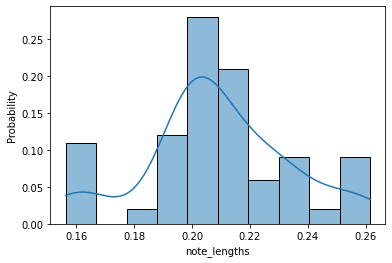

In [ ]:
sns.histplot(df['note_lengths'], stat='probability', kde=True)

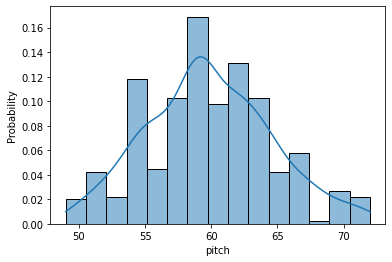

In [ ]:
sns.histplot(df['pitch'], stat='probability', kde=True)

# The Glorious LSTM Model

In [ ]:
pitchnames = sorted(set(item for item in df['pitch']))
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
print(note_to_int)

sequence_length = 10
pitch_inputs = []
pitch_outputs = []

for i in range(0, len(df['pitch']) - sequence_length, 1):
    sequence_in = df['pitch'][i:i + sequence_length]
    sequence_out = df['pitch'][i + sequence_length]
    pitch_inputs.append([note_to_int[char] for char in sequence_in])
    pitch_outputs.append(note_to_int[sequence_out])

{49.0: 0, 50.0: 1, 51.0: 2, 52.0: 3, 53.0: 4, 54.0: 5, 55.0: 6, 56.0: 7, 57.0: 8, 58.0: 9, 59.0: 10, 60.0: 11, 61.0: 12, 62.0: 13, 63.0: 14, 64.0: 15, 65.0: 16, 66.0: 17, 67.0: 18, 68.0: 19, 69.0: 20, 70.0: 21, 71.0: 22, 72.0: 23}


In [ ]:
import tensorflow as tf
pitch_inputs = np.reshape(pitch_inputs, (len(pitch_inputs), sequence_length, 1))
pitch_outputs = tf.keras.utils.to_categorical(pitch_outputs, num_classes=24)
pitch_outputs = np.asarray(pitch_outputs)
#pitch_outputs = np.reshape(pitch_outputs, (len(pitch_outputs), 24, 1))

In [ ]:
pitch_inputs = np.asarray(pitch_inputs)

In [ ]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, RNN
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(LSTM(256, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(24))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24)


In [ ]:
model.fit(pitch_inputs, pitch_outputs, epochs=300, batch_size=64)

Epoch 1/300
7/7 [==============================] - 3s 64ms/step - loss: 2.9838
Epoch 2/300
7/7 [==============================] - 0s 55ms/step - loss: 2.8018
Epoch 3/300
7/7 [==============================] - 0s 60ms/step - loss: 2.7585
Epoch 4/300
7/7 [==============================] - 0s 57ms/step - loss: 2.7091
Epoch 5/300
7/7 [==============================] - 0s 52ms/step - loss: 2.7104
Epoch 6/300
7/7 [==============================] - 0s 59ms/step - loss: 2.6931
Epoch 7/300
7/7 [==============================] - 0s 52ms/step - loss: 2.6578
Epoch 8/300
7/7 [==============================] - 0s 51ms/step - loss: 2.6504
Epoch 9/300
7/7 [==============================] - 0s 57ms/step - loss: 2.5999
Epoch 10/300
7/7 [==============================] - 0s 61ms/step - loss: 2.5965
Epoch 11/300
7/7 [==============================] - 0s 58ms/step - loss: 2.5816
Epoch 12/300
7/7 [==============================] - 0s 55ms/step - loss: 2.5671
Epoch 13/300
7/7 [==============================]

In [ ]:
model.save('benWebsterBot.h5')

In [ ]:
y_probs = model.predict(pitch_inputs)

14/14 [==============================] - 1s 16ms/step


In [ ]:
print(y_probs / 0.05)

[[1.4979343e-05 1.9052210e-03 3.5644183e-03 ... 1.5497404e-05
  1.3752637e-05 1.0540284e-06]
 [4.0496379e-06 8.4104657e-04 3.6336177e-03 ... 2.2564407e-06
  4.0410964e-06 6.4331493e-07]
 [8.1357521e-06 3.3436876e-03 9.1781579e-03 ... 3.2384032e-05
  3.4578695e-06 2.0418850e-06]
 ...
 [6.6463504e-06 2.1038104e-03 1.6355079e-05 ... 1.6212636e-06
  1.3254061e-05 2.2718825e-03]
 [1.5434767e-06 2.2209350e-02 6.1896303e-06 ... 7.2229859e-08
  1.2164619e-05 1.8007562e-06]
 [2.3558048e-05 1.3961870e-02 2.0406933e-05 ... 2.2211009e-06
  2.2632057e-05 2.8725245e-07]]


In [ ]:
temperature = 0.75

y_pred = tf.one_hot(tf.argmax(y_probs / temperature, axis=1), depth = 24)
print(y_pred[0])
#predictions = tf.squeeze(y_pred, 0)
#predictions = predictions / 0.5
#predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
#nput_eval = tf.expand_dims([predicted_id], 0)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(24,), dtype=float32)


In [ ]:
notes = np.array([])
for item in y_pred:
  index = tf.argmax(item)
  notes = np.append(notes, index+48)

In [ ]:
print(notes)

[59. 58. 60. 63. 61. 58. 56. 51. 56. 58. 61. 52. 56. 58. 61. 51. 54. 53.
 54. 55. 58. 64. 62. 63. 59. 58. 59. 58. 56. 58. 51. 53. 58. 56. 54. 55.
 58. 61. 64. 62. 63. 61. 62. 60. 61. 60. 58. 59. 58. 57. 55. 56. 53. 49.
 55. 56. 53. 54. 52. 51. 54. 55. 58. 61. 54. 58. 59. 60. 63. 60. 61. 63.
 64. 61. 62. 63. 58. 53. 56. 55. 51. 55. 59. 59. 51. 53. 55. 58. 61. 59.
 50. 50. 49. 48. 49. 61. 58. 58. 56. 51. 51. 49. 53. 54. 56. 58. 54. 54.
 55. 53. 58. 64. 63. 66. 57. 54. 56. 54. 58. 59. 60. 61. 60. 57. 60. 59.
 54. 54. 53. 58. 61. 61. 58. 61. 58. 61. 58. 61. 58. 61. 57. 59. 58. 59.
 63. 59. 58. 56. 62. 59. 58. 56. 61. 58. 57. 58. 61. 64. 65. 61. 63. 64.
 61. 61. 63. 64. 61. 63. 59. 54. 49. 53. 68. 66. 67. 62. 63. 64. 68. 68.
 64. 56. 56. 57. 59. 63. 63. 59. 51. 51. 54. 58. 61. 58. 57. 51. 52. 53.
 54. 58. 61. 63. 61. 63. 61. 58. 56. 54. 61. 57. 58. 54. 58. 61. 63. 64.
 61. 63. 64. 61. 64. 64. 61. 63. 54. 55. 58. 61. 64. 61. 63. 58. 53. 54.
 55. 58. 59. 57. 54. 51. 50. 50. 59. 56. 55. 49. 58

In [ ]:
note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

In [ ]:
cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

In [ ]:
lstm_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
lstm_tenor = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
lstm_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    lstm_tenor.notes.append(pretty_midi.Note(int(velocity), int(pitch), start, end))
print(inst.notes)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

In [ ]:
lstm_generation.write('lstm_tenor.mid')

In [ ]:
lstm_df = pd.DataFrame()

pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

lstm_df['pitch'] = pd.Series(pitch)

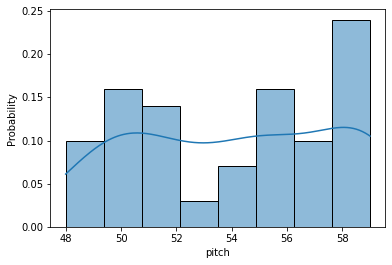

In [ ]:
# despite the LSTM being the most accurate in terms of pitch generation
# its not calibrated very well as the generated pitches no longer (roughly) follow a normal distribution
# It seems only be capturing patterns within the most used notes and discarding outliers that are rare
# but still important to the structure of the melody
sns.histplot(lstm_df['pitch'], stat='probability', kde=True)

In [ ]:
# Add more parameters to see if it will affect calibration
large_model = Sequential()
large_model.add(LSTM(512, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2])))
large_model.add(Dropout(0.2))
large_model.add(Dense(24))
large_model.add(Activation('softmax'))
large_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
large_model.fit(pitch_inputs, pitch_outputs, epochs=300, batch_size=64)

Epoch 1/300
7/7 [==============================] - 4s 190ms/step - loss: 2.9746
Epoch 2/300
7/7 [==============================] - 1s 193ms/step - loss: 2.8153
Epoch 3/300
7/7 [==============================] - 1s 187ms/step - loss: 2.7681
Epoch 4/300
7/7 [==============================] - 2s 229ms/step - loss: 2.7471
Epoch 5/300
7/7 [==============================] - 2s 285ms/step - loss: 2.6861
Epoch 6/300
7/7 [==============================] - 2s 223ms/step - loss: 2.6727
Epoch 7/300
7/7 [==============================] - 1s 183ms/step - loss: 2.6516
Epoch 8/300
7/7 [==============================] - 1s 186ms/step - loss: 2.6107
Epoch 9/300
7/7 [==============================] - 1s 181ms/step - loss: 2.5866
Epoch 10/300
7/7 [==============================] - 1s 180ms/step - loss: 2.5832
Epoch 11/300
7/7 [==============================] - 1s 185ms/step - loss: 2.5475
Epoch 12/300
7/7 [==============================] - 1s 188ms/step - loss: 2.5339
Epoch 13/300
7/7 [===================

In [ ]:
large_model.save('large_lstm.h5')

In [ ]:
y_probs = large_model.predict(pitch_inputs)

14/14 [==============================] - 1s 34ms/step


In [ ]:
temperature = 0.75

y_pred = tf.one_hot(tf.argmax(y_probs / temperature, axis=1), depth = 24)

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

lstm_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
lstm_tenor = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
lstm_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    lstm_tenor.notes.append(pretty_midi.Note(int(velocity), int(pitch), start, end))
print(inst.notes)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

In [ ]:
lstm_generation.write('large_lstm_tenor.mid')

In [ ]:
large_lstm_df = pd.DataFrame()

pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

large_lstm_df['pitch'] = pd.Series(pitch)

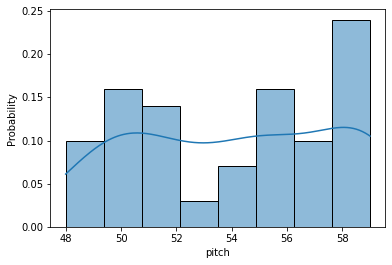

In [ ]:
sns.histplot(large_lstm_df['pitch'], stat='probability', kde=True)

In [ ]:
# less parameters to keep the model lightweight, longer memory to pick up outliers
stacked_model = Sequential()
stacked_model.add(LSTM(128, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2]), return_sequences=True))
stacked_model.add(Dropout(0.2))
stacked_model.add(LSTM(128))
stacked_model.add(Dense(24))
stacked_model.add(Activation('softmax'))
stacked_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
stacked_model.fit(pitch_inputs, pitch_outputs, epochs=300, batch_size=64)

Epoch 1/300
7/7 [==============================] - 5s 65ms/step - loss: 2.9750
Epoch 2/300
7/7 [==============================] - 0s 58ms/step - loss: 2.8207
Epoch 3/300
7/7 [==============================] - 0s 59ms/step - loss: 2.7951
Epoch 4/300
7/7 [==============================] - 0s 60ms/step - loss: 2.7722
Epoch 5/300
7/7 [==============================] - 1s 82ms/step - loss: 2.7702
Epoch 6/300
7/7 [==============================] - 1s 110ms/step - loss: 2.7418
Epoch 7/300
7/7 [==============================] - 1s 115ms/step - loss: 2.7238
Epoch 8/300
7/7 [==============================] - 1s 113ms/step - loss: 2.7078
Epoch 9/300
7/7 [==============================] - 1s 109ms/step - loss: 2.6872
Epoch 10/300
7/7 [==============================] - 1s 99ms/step - loss: 2.6771
Epoch 11/300
7/7 [==============================] - 0s 60ms/step - loss: 2.6440
Epoch 12/300
7/7 [==============================] - 0s 63ms/step - loss: 2.6242
Epoch 13/300
7/7 [===========================

In [ ]:
y_probs = stacked_model.predict(pitch_inputs)

14/14 [==============================] - 1s 16ms/step


In [ ]:
temperature = 0.75

y_pred = tf.one_hot(tf.argmax(y_probs / temperature, axis=1), depth = 24)

notes = np.array([])
for item in y_pred:
  index = tf.argmax(item)
  notes = np.append(notes, index+48)

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

lstm_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
lstm_tenor = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
lstm_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    lstm_tenor.notes.append(pretty_midi.Note(int(velocity), int(pitch), start, end))
print(inst.notes)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

In [ ]:
lstm_generation.write('stacked_lstm_tenor.mid')

In [ ]:
stacked_lstm_df = pd.DataFrame()

pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

stacked_lstm_df['pitch'] = pd.Series(pitch)

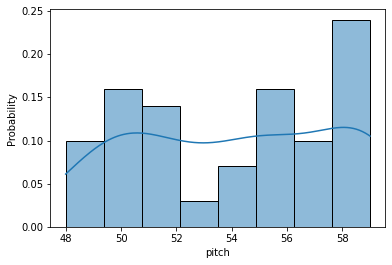

In [ ]:
sns.histplot(stacked_lstm_df['pitch'], stat='probability', kde=True)

## Peephole LSTM

In [ ]:
LSTMCell = tfa.rnn.PeepholeLSTMCell(512, recurrent_initializer='glorot_uniform')
peephole_model = Sequential()
peephole_model.add(RNN(LSTMCell, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2])))
peephole_model.add(Dropout(0.1))
peephole_model.add(Dense(24))
peephole_model.add(Activation('softmax'))
peephole_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
peephole_model.fit(pitch_inputs, pitch_outputs, epochs=300, batch_size=64)

Epoch 1/300
7/7 [==============================] - 5s 239ms/step - loss: 2.9460
Epoch 2/300
7/7 [==============================] - 1s 192ms/step - loss: 2.8140
Epoch 3/300
7/7 [==============================] - 1s 187ms/step - loss: 2.7563
Epoch 4/300
7/7 [==============================] - 1s 194ms/step - loss: 2.7145
Epoch 5/300
7/7 [==============================] - 1s 183ms/step - loss: 2.6814
Epoch 6/300
7/7 [==============================] - 1s 193ms/step - loss: 2.6377
Epoch 7/300
7/7 [==============================] - 1s 193ms/step - loss: 2.6338
Epoch 8/300
7/7 [==============================] - 1s 197ms/step - loss: 2.5939
Epoch 9/300
7/7 [==============================] - 2s 295ms/step - loss: 2.5648
Epoch 10/300
7/7 [==============================] - 2s 273ms/step - loss: 2.5455
Epoch 11/300
7/7 [==============================] - 1s 190ms/step - loss: 2.5197
Epoch 12/300
7/7 [==============================] - 1s 189ms/step - loss: 2.5145
Epoch 13/300
7/7 [===================

KeyboardInterrupt: ignored

In [ ]:
peephole_model.save('peephole_lstm.h5')

In [ ]:
y_probs = peephole_model.predict(pitch_inputs)
print(y_probs[0])

temperature = 0.0001
y_probs = y_probs / temperature

#y_pred = tf.one_hot(tf.argmax(y_probs / temperature, axis=1), depth = 24)
#print(y_probs[0])

notes = np.array([])
for i in range(len(y_probs)):
  probs = y_probs[i]
  probs = probs / probs.sum(axis=0,keepdims=1)
  value = np.random.choice(y_probs[i], p=probs)
  index = np.where(y_probs[i] == value)
  print(int(index[0]))
  notes = np.append(notes, int(index[0])+48)

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

lstm_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
lstm_tenor = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
lstm_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    lstm_tenor.notes.append(pretty_midi.Note(int(velocity), int(pitch), start, end))
print(inst.notes)

14/14 [==============================] - 0s 30ms/step
[1.09078634e-07 4.60988804e-06 1.81036739e-05 2.53199425e-04
 2.93017318e-03 5.49670804e-05 1.40213306e-05 5.87183081e-07
 1.48043782e-05 2.90385651e-06 8.32234335e-04 9.81640518e-01
 1.15263537e-02 2.42891512e-03 1.02132974e-04 7.85169686e-06
 1.29194392e-04 2.25439271e-05 1.47803821e-05 1.19682738e-07
 5.47039292e-07 8.90800834e-07 4.54554112e-07 1.53927893e-08]
11
10
12
10
13
10
8
3
8
10
13
4
8
10
13
3
6
5
6
7
10
16
14
15
11
10
11
10
8
10
3
5
10
8
6
7
10
13
16
14
15
13
14
12
13
12
10
11
10
9
7
8
5
1
7
8
5
6
4
3
6
7
10
13
6
10
11
12
15
12
13
15
16
13
14
15
10
5
8
7
3
7
11
11
3
5
7
10
13
11
2
2
1
0
1
13
10
10
8
3
3
1
5
6
8
10
6
6
7
5
10
16
15
18
9
6
8
6
10
11
12
13
12
9
12
11
6
6
5
10
13
13
10
13
10
13
10
13
10
13
9
11
10
8
15
11
10
8
14
11
10
8
13
10
9
10
13
16
17
13
15
16
13
13
15
16
13
15
11
6
1
5
20
18
19
14
15
16
20
20
16
8
8
9
11
15
15
11
3
3
6
10
13
10
9
3
4
5
6
10
13
15
13
15
13
10
8
6
13
9
10
6
10
13
15
16
13
15
16
13
16
1

In [ ]:
lstm_generation.write('peephole_lstm.mid')

In [ ]:
peephole_df = pd.DataFrame()

pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

peephole_df['pitch'] = pd.Series(pitch)

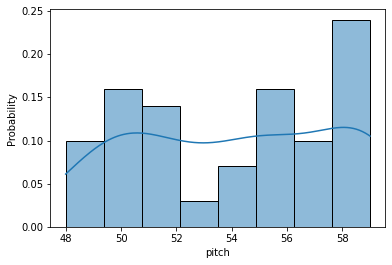

In [ ]:
sns.histplot(peephole_df['pitch'], stat='probability', kde=True)

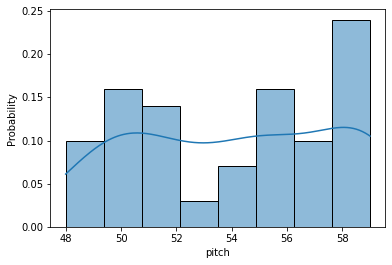

In [ ]:
sns.histplot(stacked_lstm_df['pitch'], stat='probability', kde=True)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(24,), dtype=float32)
